<a href="https://colab.research.google.com/github/cindy12651269/Prediction_of_quality_of_Wine/blob/cindy12651269%2Fhw1/Prediction_of_quality_of_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of quality of Wine

##Environment setup


In [8]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from google.colab import files


##Load the data

In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [11]:
wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [14]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Statistical Observation

In [16]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
for columns in wine.columns:
    print(columns)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality



###Exercise: Please identify the definitions of the other fields.
Link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

**fixed acidity**: Non-volatile acids that contribute to wine's tartness and stability.

**volatile acidity**: Volatile acids that can cause a vinegar-like taste if too high.

**citric acid**: Adds a fresh, citrus-like flavor to the wine.

**residual sugar**: Remaining sugar after fermentation, affecting sweetness.

**chlorides**: Chloride ions that can influence the wine's taste and mouthfeel.

**free sulfur dioxide**: Unbound SO2 that protects wine from spoilage and oxidation.

**total sulfur dioxide**: Total SO2 content, including both free and bound forms.

**density**: A measure of wine's mass per unit volume, related to sugar and alcohol.

**pH**: Indicates wine's acidity, affecting taste and stability.

**sulphates**: Sulfate ions contributing to bitterness and preservative qualities.

**alcohol**: Ethanol content that adds body and warmth to the wine.

**quality**: Overall wine score based on taste, balance, and complexity.

##Check if the range of values for each numerical field is the same.

In [19]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


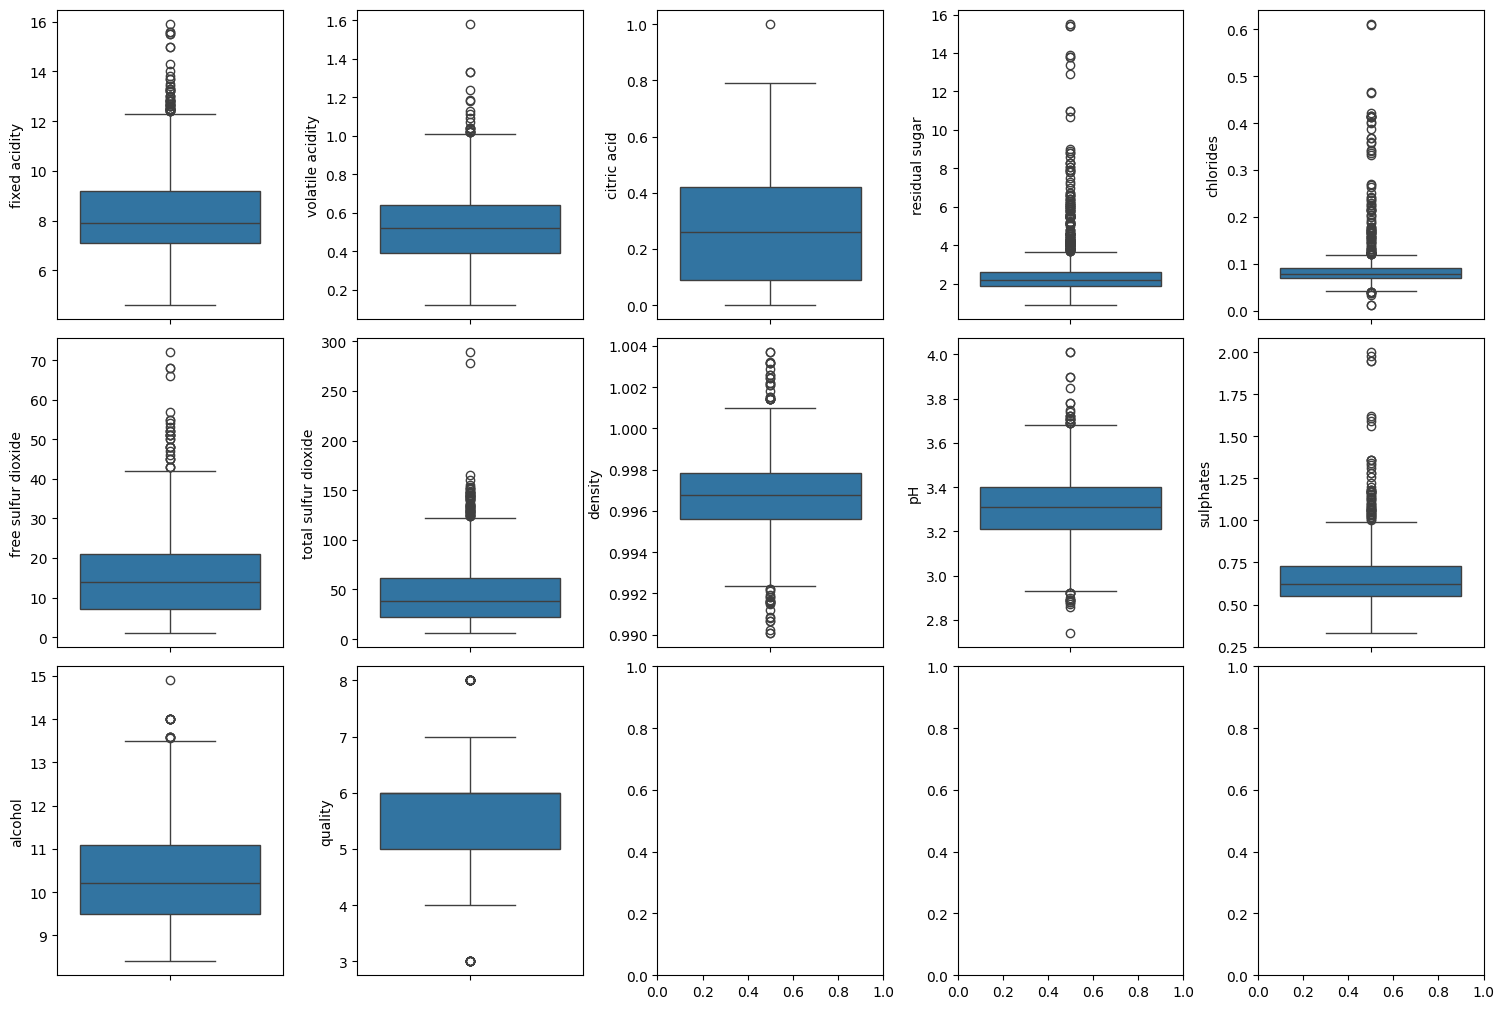

In [20]:
fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize=(15,10))
ax = ax.flatten()
index = 0
for i in wine.columns:
    if i!='quailty':
        sns.boxplot(y=i, data=wine, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.4)
plt.show()
# Fixed acidity: The distribution is concentrated between 6 and 10, and some outliers are above 12.
# Volatile Acidity: Most data points fall between 0.2 and 0.6, and Several outliers exist above 1.0.
# Citric Acid:The majority of the values are between 0.0 and 0.6, and a few outliers are above 1.0.
# Density: Most values range from 0.994 to 0.998, and a few outliers are slightly above 1.000.
# PH: The pH values are generally between 3.0 and 3.4, and some outliers below 3.0.

##Further analyze the relationship between other numerical features and "quality"

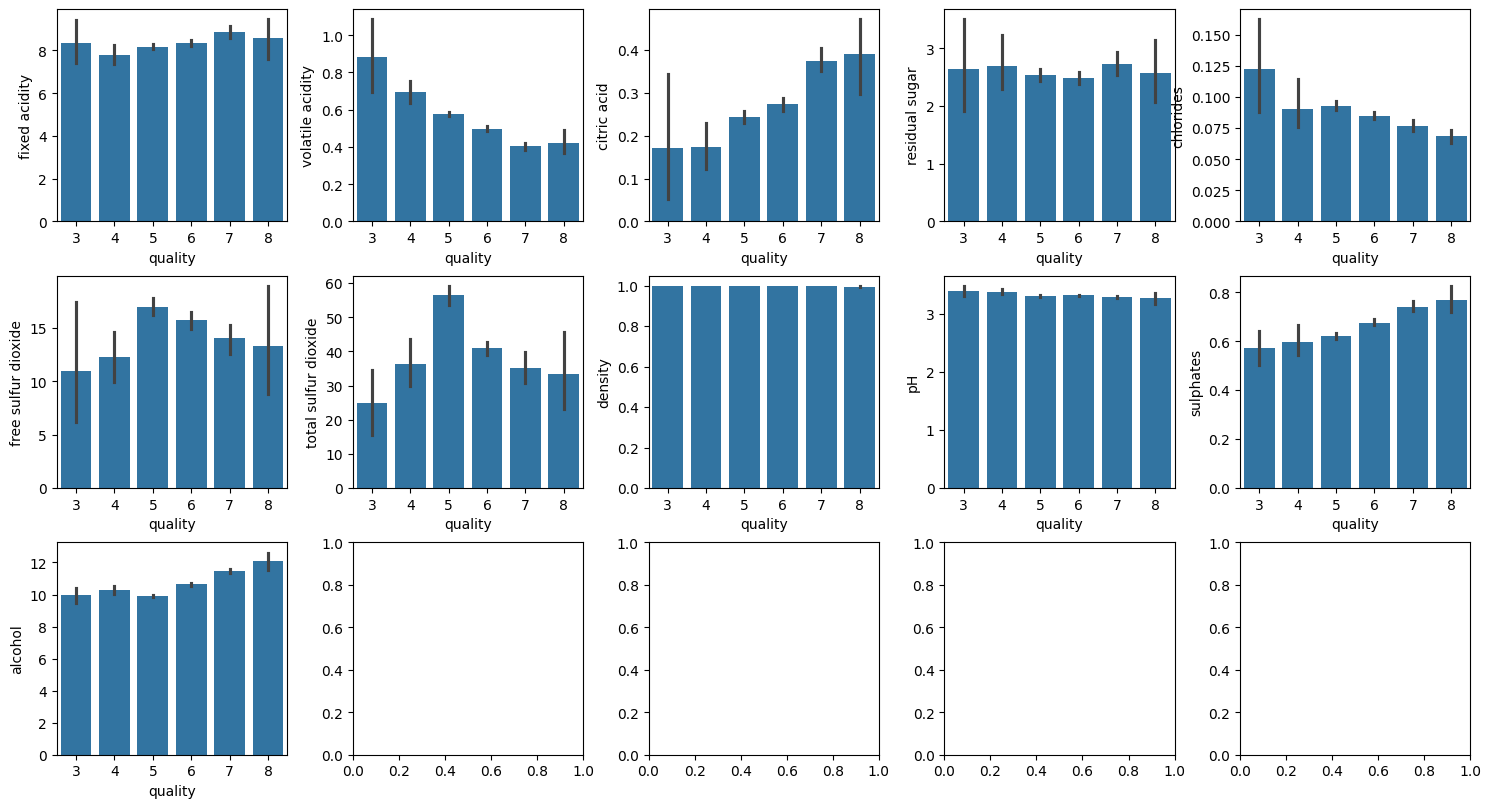

In [21]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,8))
ax = ax.flatten()
index=0
for i in wine.columns:
    if i!='quality':
        sns.barplot(x='quality', y=i, data=wine, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.4)
plt.show()

#Fixed acidity shows no distinction in relation to quality.

#The higher the quality of the red wine, the lower the volatile acidity.
#The higher the quality of the red wine, the higher the citric acid content.

#Density shows no distinction in relation to quality.
#PH shows no distinction in relation to quality.

##Observe the degree of relationship between features

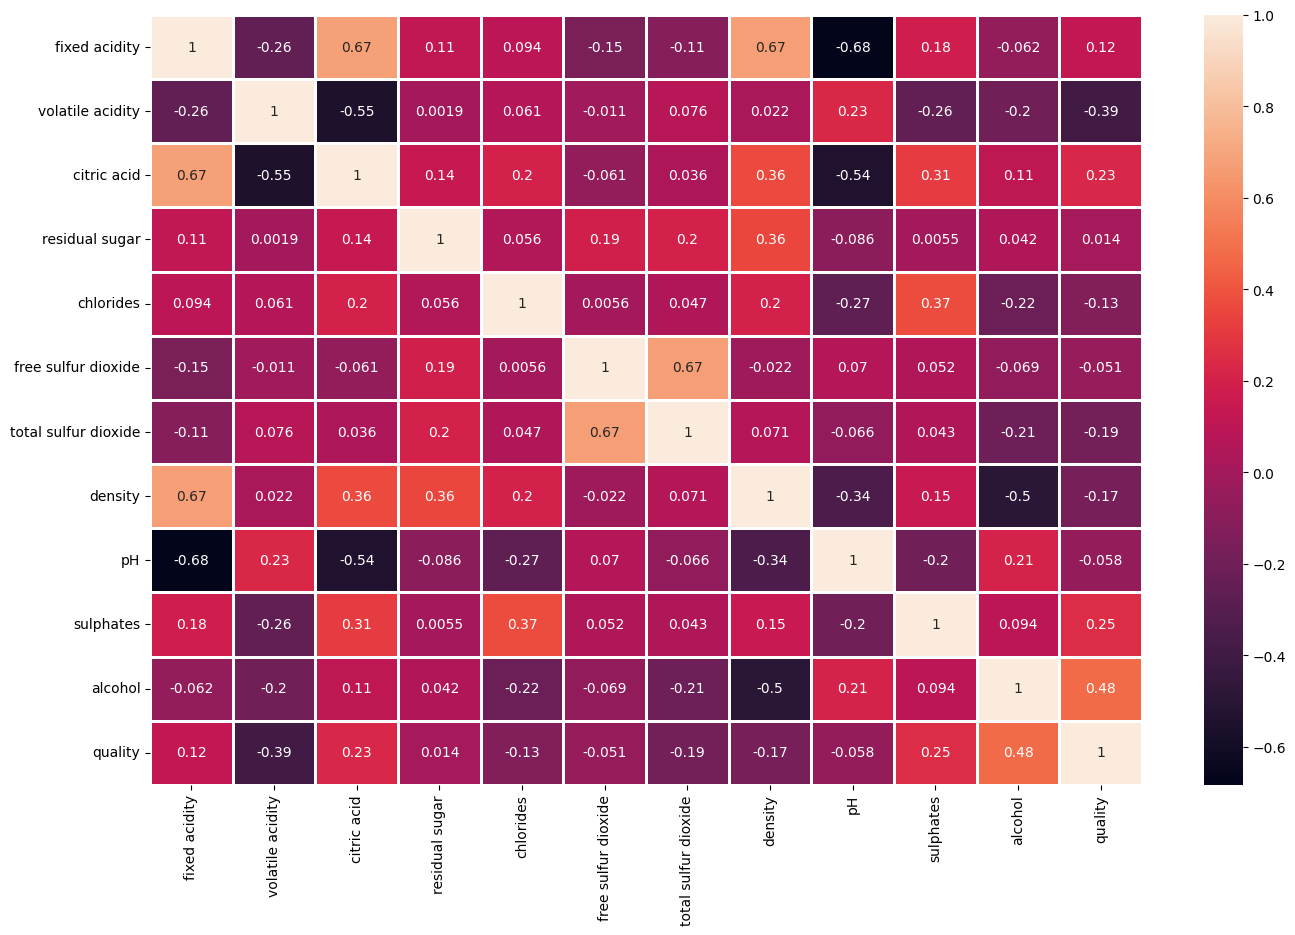

In [22]:
# Compare the correlation between each feature
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(wine.corr(), annot=True, linewidth=1)
plt.show()

# Identify features with high positive correlation

##Observe the degree of class imbalance in the data

<Axes: xlabel='quality'>

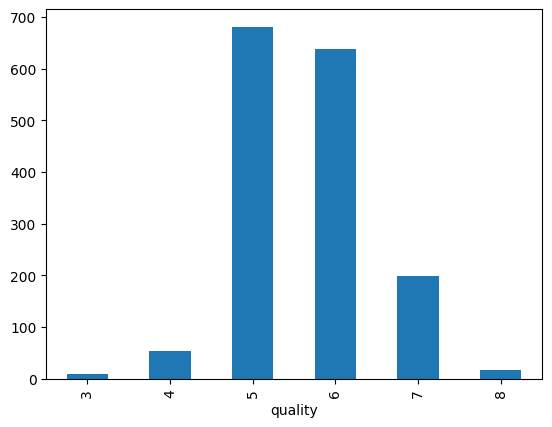

In [23]:
groups = wine.groupby('quality').size()
groups.plot.bar()

##Data Cleaning

###Missing Values


In [24]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
wine.isnull().any()

,0
fixed acidity,False
volatile acidity,False
citric acid,False
residual sugar,False
chlorides,False
free sulfur dioxide,False
total sulfur dioxide,False
density,False
pH,False
sulphates,False


##Content Cleaning

In [26]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


##Feature Engineering


###Extract New Features

In [27]:
#According to the Santa Rosa article (http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf), the higher the quality, the higher the concentration of free sulfur dioxide.
wine['mso2'] = wine['free sulfur dioxide']/ (1 + 10**wine["pH"] - 1.81)

<Axes: xlabel='quality'>

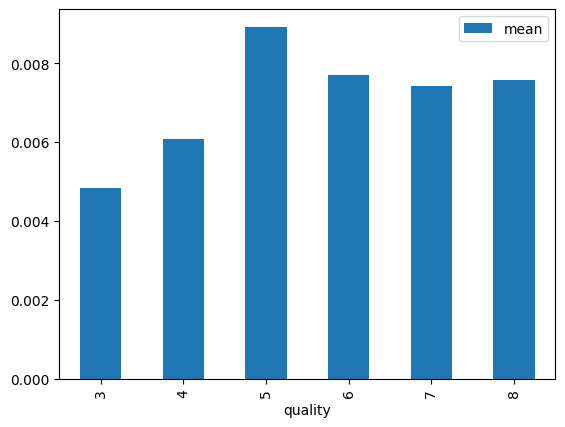

In [28]:
wine.groupby("quality")["mso2"].aggregate(['mean']).plot.bar()

###Normalization is crucial when feature ranges differ greatly, ensuring balanced influence and improving model performance


In [29]:
##Normalization
scaler = StandardScaler()
feature_columns = wine.columns.difference(['quality'])
wine[feature_columns] = scaler.fit_transform(wine[feature_columns])

###Data type conversion

In [30]:
# Divide quality into 2 categories: 'good' and 'bad'
bins = (0, 6.5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [31]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

<Axes: xlabel='quality'>

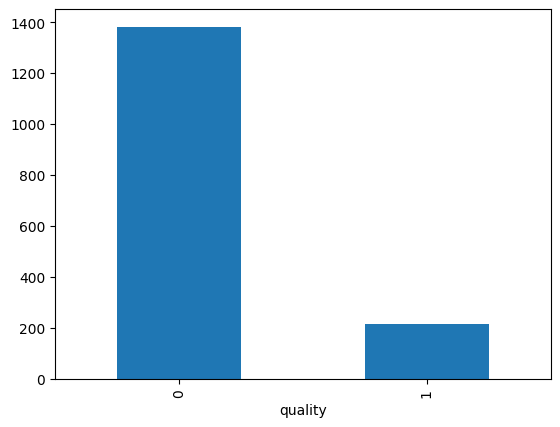

In [32]:
wine['quality'].value_counts().plot.bar()
# data imbalance: upsampling, downsampling, ...

###Split the training set, test set, and validation set

In [33]:
X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [34]:
display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

(1023, 12)

(320, 12)

(256, 12)

In [35]:
y_val.value_counts()

,count
quality,
0,221
1,35


In [36]:
y_train.value_counts()

,count
quality,
0,884
1,139


###Train the mode

In [37]:
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc_eval = cross_val_score(estimator=rfc, X = X_train, y =y_train, cv = 5)
display(rfc_eval)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

array([0.91219512, 0.88780488, 0.87804878, 0.89215686, 0.87745098])

In [38]:
#Model Performance
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       277
           1       0.85      0.51      0.64        43

    accuracy                           0.92       320
   macro avg       0.89      0.75      0.80       320
weighted avg       0.92      0.92      0.91       320



In [39]:
clf = LogisticRegression().fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       277
           1       0.67      0.33      0.44        43

    accuracy                           0.89       320
   macro avg       0.78      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320



##Model Optimization

###Hyperparameter Optimization

In [40]:
rfc = RandomForestClassifier(random_state=42)
Parameters = {
  'max_depth' : [5, 10, 20],
  'n_estimators': [10, 50, 100, 150],
}

cv = RandomizedSearchCV(rfc, Parameters, cv=5)
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'n_estimators': [10, 50, 100, 150]})

In [41]:
pred_clf = cv.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       277
           1       0.91      0.49      0.64        43

    accuracy                           0.93       320
   macro avg       0.92      0.74      0.80       320
weighted avg       0.92      0.93      0.91       320



In [42]:
cv.best_params_

{'n_estimators': 10, 'max_depth': 20}

#NNmodel（Neural Network Model）

##PyTorch

In [41]:
import torch

# Create model architecture
class Model(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, 64)
        self.hidden2 = torch.nn.Linear(64, 32)
        self.predict = torch.nn.Linear(32, output_size)

    def forward(self, x):
        output1 = torch.relu(self.hidden1(x))  # Apply ReLU activation to the first hidden layer
        output2 = torch.relu(self.hidden2(output1))  # Apply ReLU activation to the second hidden layer
        output = torch.sigmoid(self.predict(output2))  # Apply Sigmoid activation to the output layer for binary classification
        return output

# Initialize model and optimizer
model = Model(X_test.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0)  # Stochastic Gradient Descent (SGD) optimizer for updating model parameters
loss_func = torch.nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification

# Convert data to tensors (torch-specific format)
x_data = torch.tensor(X_train.values, dtype=torch.float32)
y_data = torch.tensor(np.expand_dims(y_train, axis=1), dtype=torch.float32)

x_val_data = torch.tensor(X_val.values, dtype=torch.float32)
y_val_data = torch.tensor(np.expand_dims(y_val, axis=1), dtype=torch.float32)

x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_test_data = torch.tensor(np.expand_dims(y_test, axis=1), dtype=torch.float32)

# Set batch size and number of training epochs
batch_size = 32
num_epochs = 200

training_losses = []
val_losses = []

for epoch in range(num_epochs):
    for i in range(0, len(x_data), batch_size):
        prediction = model(x_data[i:i+batch_size])
        loss = loss_func(prediction, y_data[i:i+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    training_losses.append(float(loss))

    y_pred = model(x_val_data)
    val_loss = loss_func(y_pred, y_val_data)
    print("training loss:{}, val loss:{}, val acc:{}".format(
        float(loss), val_loss, accuracy_score(y_val_data, np.where(y_pred >= 0.5, 1, 0))))

    val_losses.append(float(val_loss))


training loss:0.41714245080947876, val loss:0.4165405333042145, val acc:0.86328125
training loss:0.35344958305358887, val loss:0.34883448481559753, val acc:0.86328125
training loss:0.3287152051925659, val loss:0.3242928087711334, val acc:0.86328125
training loss:0.31188735365867615, val loss:0.3090154826641083, val acc:0.86328125
training loss:0.30115005373954773, val loss:0.2998926043510437, val acc:0.86328125
training loss:0.29339051246643066, val loss:0.2939257323741913, val acc:0.86328125
training loss:0.28753045201301575, val loss:0.28987735509872437, val acc:0.86328125
training loss:0.28302693367004395, val loss:0.28721070289611816, val acc:0.8671875
training loss:0.2794065475463867, val loss:0.2853606939315796, val acc:0.87109375
training loss:0.276513934135437, val loss:0.2842535674571991, val acc:0.875
training loss:0.2742234468460083, val loss:0.2835753858089447, val acc:0.8671875
training loss:0.272173136472702, val loss:0.28296172618865967, val acc:0.87109375
training loss:

In [42]:
y_pred = model(x_test_data)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       277
           1       0.71      0.56      0.62        43

    accuracy                           0.91       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.91      0.90       320



Text(0, 0.5, 'loss')

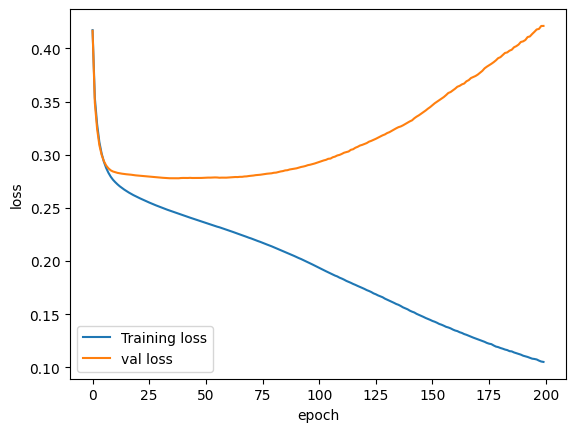

In [45]:
plt.plot(training_losses)
plt.plot(val_losses)
plt.legend(("Training loss", "val loss"))
plt.xlabel("epoch")
plt.ylabel("loss")

##Keras

In [43]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Dense(64, name="hidden1", activation="relu"),
    layers.Dense(32, name="hidden2", activation="relu"),
    layers.Dense(1, name="output", activation=tf.nn.sigmoid),
])
optimizer = keras.optimizers.SGD(learning_rate=0.05)
model.compile(optimizer=optimizer, loss=tfa.losses.SigmoidFocalCrossEntropy(), metrics=["Accuracy"])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32)

Epoch 1/200
32/32 [==============================] - 4s 20ms/step - loss: 0.0358 - Accuracy: 0.8631 - val_loss: 0.0275 - val_Accuracy: 0.8672
Epoch 2/200
32/32 [==============================] - 0s 8ms/step - loss: 0.0278 - Accuracy: 0.8641 - val_loss: 0.0277 - val_Accuracy: 0.8672
Epoch 3/200
32/32 [==============================] - 0s 8ms/step - loss: 0.0268 - Accuracy: 0.8651 - val_loss: 0.0284 - val_Accuracy: 0.8633
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0258 - Accuracy: 0.8651 - val_loss: 0.0282 - val_Accuracy: 0.8750
Epoch 5/200
32/32 [==============================] - 0s 8ms/step - loss: 0.0252 - Accuracy: 0.8729 - val_loss: 0.0283 - val_Accuracy: 0.8672
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0249 - Accuracy: 0.8690 - val_loss: 0.0276 - val_Accuracy: 0.8711
Epoch 7/200
32/32 [==============================] - 0s 8ms/step - loss: 0.0245 - Accuracy: 0.8798 - val_loss: 0.0278 - val_Accuracy: 0.8672
Epoch 8/200


In [44]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.75      0.42      0.54        43

    accuracy                           0.90       320
   macro avg       0.83      0.70      0.74       320
weighted avg       0.89      0.90      0.89       320



In [45]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    